## Esse notebook resolve a questão 1 da seção 8.2 do livro de exercícios

##### _Diogo Tuler Chaves_

### Imports

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Abrindo os dados

In [21]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header=None)


### Passando os códigos dos exercícios para python

In [22]:
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


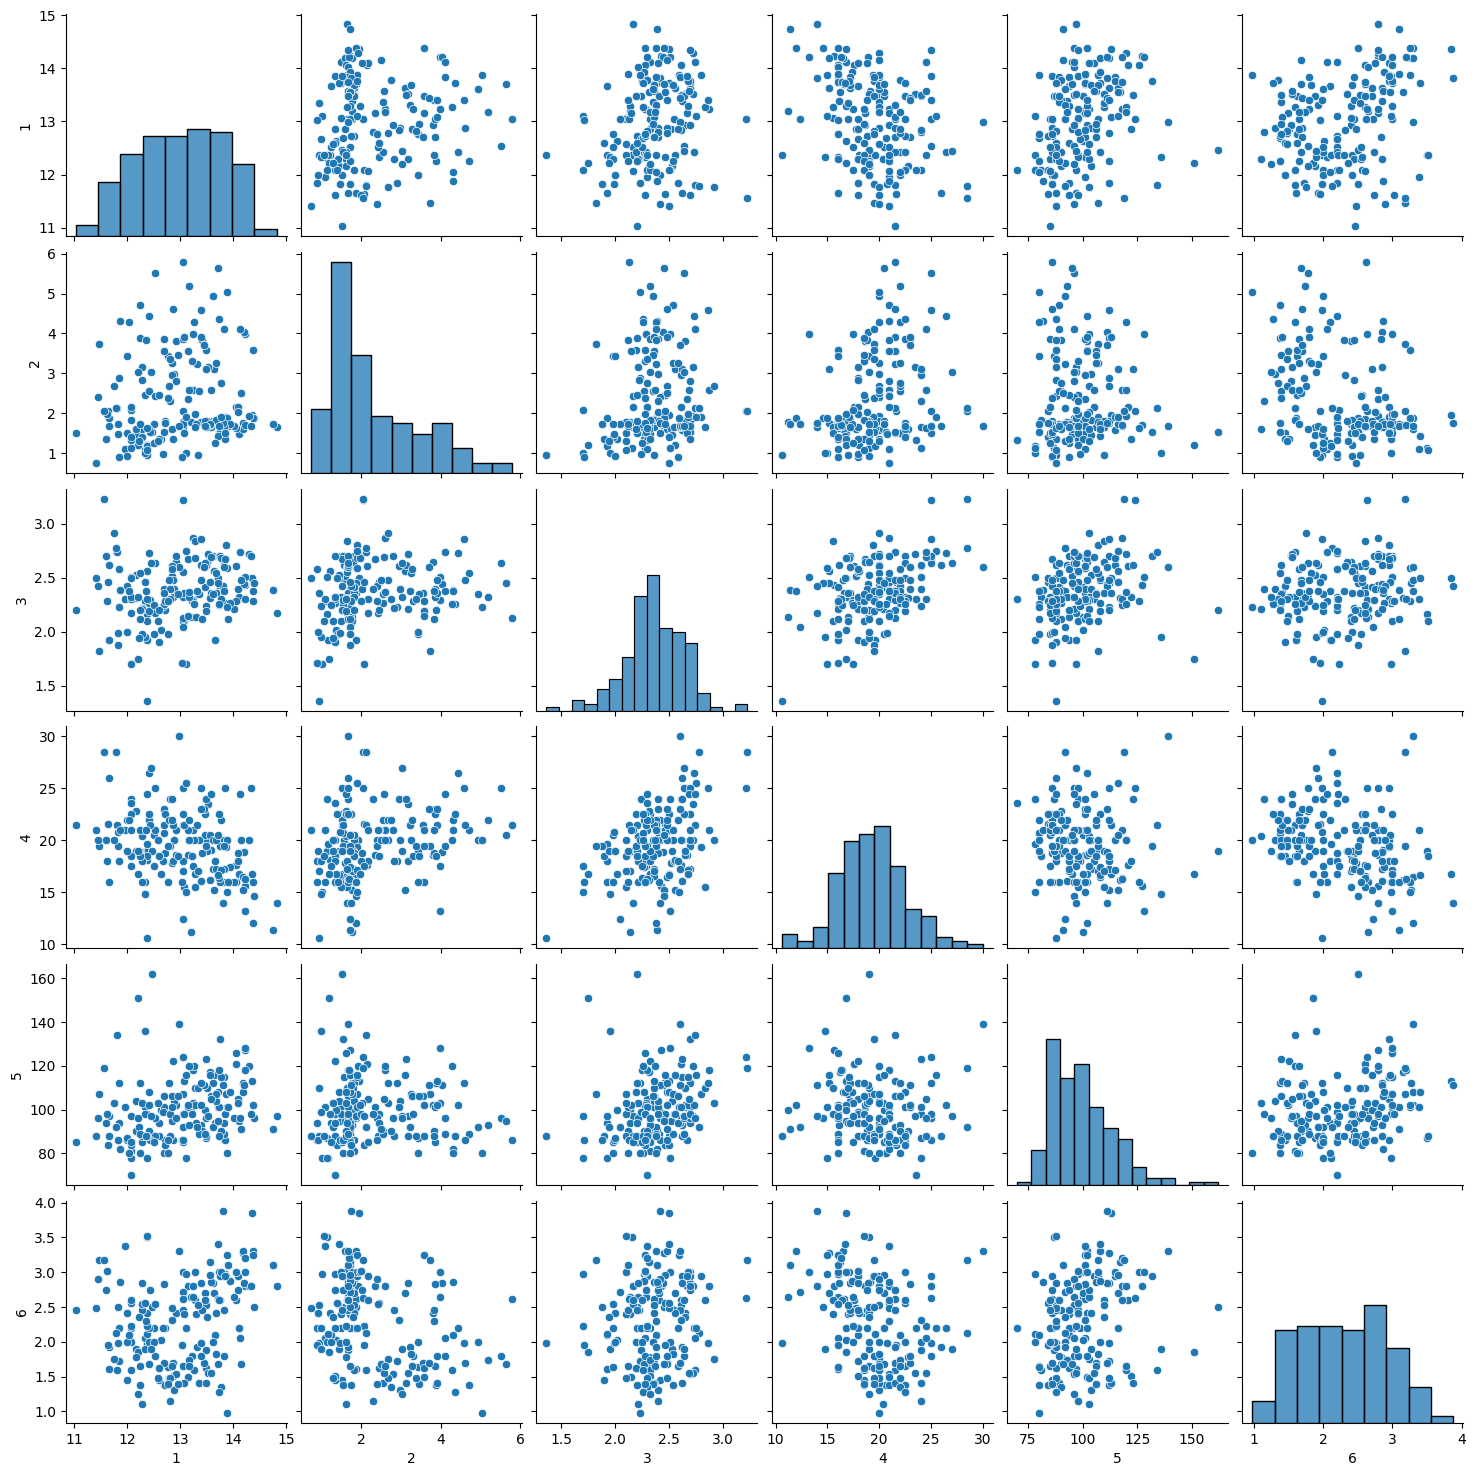

In [23]:
cols = list(range(1, 7))  
sns.pairplot(wine.iloc[:, cols], diag_kind='hist')
plt.show()

In [24]:
corr_matrix = wine.iloc[:, 1:14].corr() * 100
round(corr_matrix)

,1,2,3,4,5,6,7,8,9,10,11,12,13
1,100.0,9.0,21.0,-31.0,27.0,29.0,24.0,-16.0,14.0,55.0,-7.0,7.0,64.0
2,9.0,100.0,16.0,29.0,-5.0,-34.0,-41.0,29.0,-22.0,25.0,-56.0,-37.0,-19.0
3,21.0,16.0,100.0,44.0,29.0,13.0,12.0,19.0,1.0,26.0,-7.0,0.0,22.0
4,-31.0,29.0,44.0,100.0,-8.0,-32.0,-35.0,36.0,-20.0,2.0,-27.0,-28.0,-44.0
5,27.0,-5.0,29.0,-8.0,100.0,21.0,20.0,-26.0,24.0,20.0,6.0,7.0,39.0
6,29.0,-34.0,13.0,-32.0,21.0,100.0,86.0,-45.0,61.0,-6.0,43.0,70.0,50.0
7,24.0,-41.0,12.0,-35.0,20.0,86.0,100.0,-54.0,65.0,-17.0,54.0,79.0,49.0
8,-16.0,29.0,19.0,36.0,-26.0,-45.0,-54.0,100.0,-37.0,14.0,-26.0,-50.0,-31.0
9,14.0,-22.0,1.0,-20.0,24.0,61.0,65.0,-37.0,100.0,-3.0,30.0,52.0,33.0
10,55.0,25.0,26.0,2.0,20.0,-6.0,-17.0,14.0,-3.0,100.0,-52.0,-43.0,32.0


In [25]:
std_dev = wine.iloc[:, 1:14].apply(lambda x: x.std()).round(2)
std_dev

1       0.81
2       1.12
3       0.27
4       3.34
5      14.28
6       0.63
7       1.00
8       0.12
9       0.57
10      2.32
11      0.23
12      0.71
13    314.91
dtype: float64

In [26]:
X = wine.iloc[:, 1:14].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
wine_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

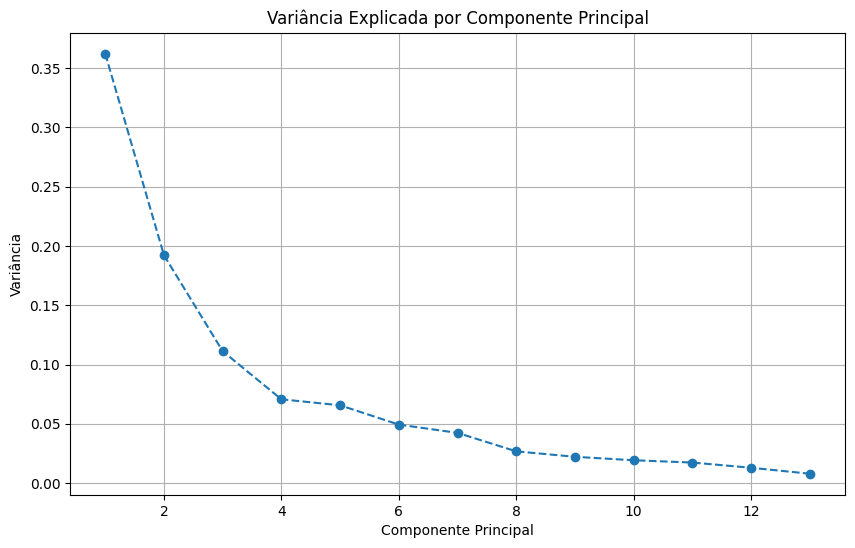

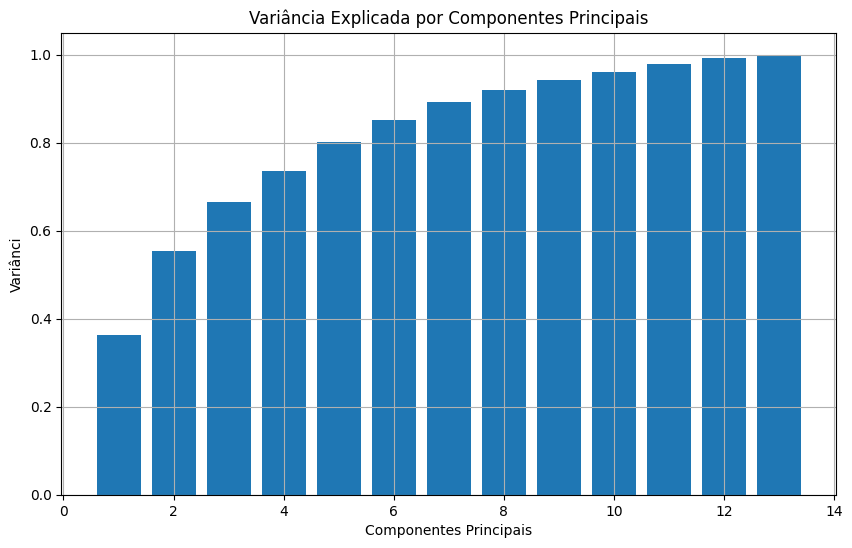

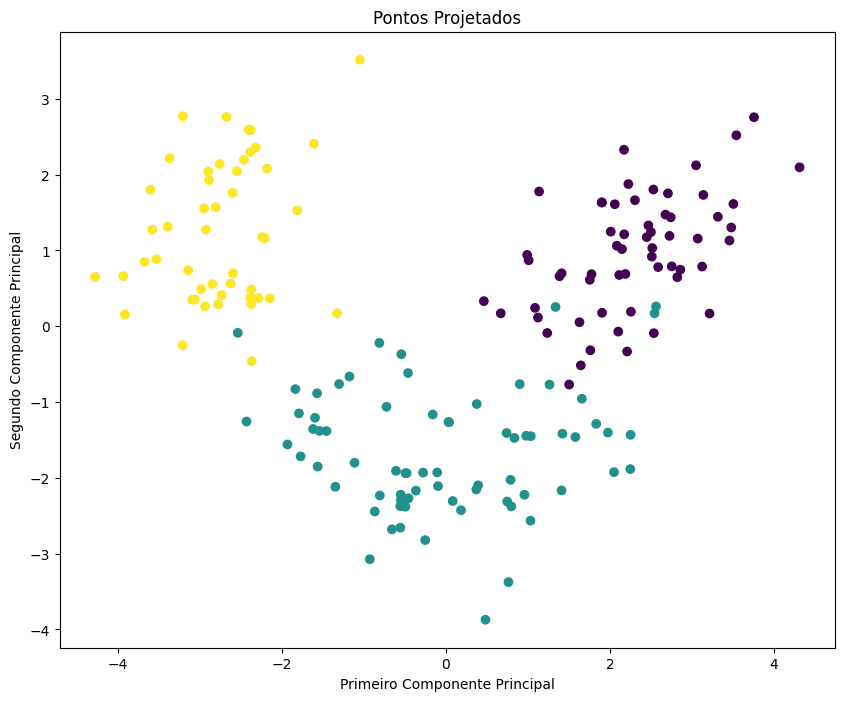

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 14), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Componente Principal')
plt.ylabel('Variância')
plt.title('Variância Explicada por Componente Principal')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(np.arange(1, 14), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes Principais')
plt.ylabel('Variânci')
plt.title('Variância Explicada por Componentes Principais')
plt.grid()
plt.show()


fscore1 = wine_pca[:, 0]
fscore2 = wine_pca[:, 1]

plt.figure(figsize=(10, 8))
plt.scatter(fscore1, fscore2, marker='o', c=wine.iloc[:, 0] + 8)
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Pontos Projetados')
plt.show()

### Resposta do exercício

In [36]:
v1 = pca.components_[0]
v2 = pca.components_[1]

Yi1 = " + ".join([f"{v1[i]:.2f}Zi{i+1}" for i in range(len(v1))])
Yi2 = " + ".join([f"{v2[i]:.2f}Zi{i+1}" for i in range(len(v2))])

print(f"Yi1 = {Yi1}")
print(f"Yi2 = {Yi2}")

Yi1 = 0.14Zi1 + -0.25Zi2 + -0.00Zi3 + -0.24Zi4 + 0.14Zi5 + 0.39Zi6 + 0.42Zi7 + -0.30Zi8 + 0.31Zi9 + -0.09Zi10 + 0.30Zi11 + 0.38Zi12 + 0.29Zi13
Yi2 = 0.48Zi1 + 0.22Zi2 + 0.32Zi3 + -0.01Zi4 + 0.30Zi5 + 0.07Zi6 + -0.00Zi7 + 0.03Zi8 + 0.04Zi9 + 0.53Zi10 + -0.28Zi11 + -0.16Zi12 + 0.36Zi13


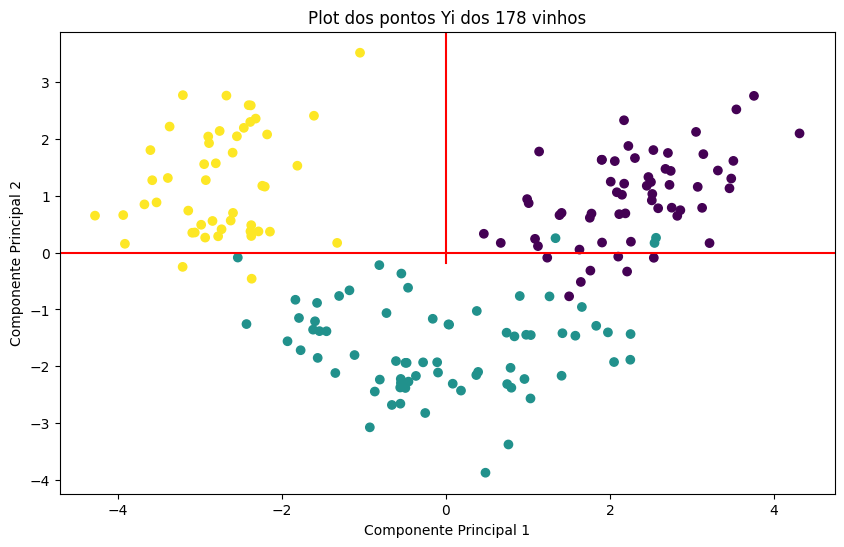

In [51]:
import matplotlib.pyplot as plt
import numpy as np

X = wine.iloc[:, 1:]
y = wine.iloc[:, 0]


Y = pca.transform(X_scaled)
Y1 = Y[:, 0]
Y2 = Y[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(Y1, Y2, c=y, cmap='viridis', marker='o')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Plot dos pontos Yi dos 178 vinhos')

plt.axvline(x=0, ymin=0.5, ymax=3, color='red')
plt.axhline(y=0, color='red')

plt.show()


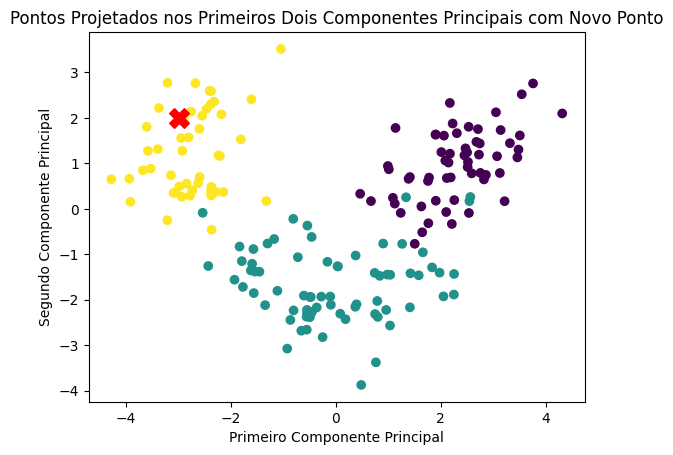

Coordenadas do novo ponto: (y1, y2) = (-2.99, 2.00)


In [34]:
x = np.array([13.95, 3.65, 2.25, 18.4, 90.18, 1.55, 0.48, 0.5, 1.34, 10.2, 0.71, 1.48, 587.14])

means = wine.iloc[:, 1:14].mean()
stds = wine.iloc[:, 1:14].std()

z = (x - means) / stds
y1 = np.dot(pca.components_[0], z)
y2 = np.dot(pca.components_[1], z)
plt.figure()
plt.scatter(fscore1, fscore2, c=wine.iloc[:, 0], cmap='viridis', marker='o')
plt.scatter(y1, y2, color='red', s=200, marker='X')
plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Pontos Projetados nos Primeiros Dois Componentes Principais com Novo Ponto')
plt.show()

print(f'Coordenadas do novo ponto: (y1, y2) = ({y1:.2f}, {y2:.2f})')